# 4.8 Grouping Data & Aggregating Variables

## Contents
### Importing Libraries
### Importing Data
### Path to Storage
### Types of Charts
### Installing and Importing Visualization Libraries
### Creating Bar Charts
### Exporting Charts
### Creating Histograms and Scatterplots
### Creating Line Charts
### Sampling Data
### Exporting Data

### Importing Libraries

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Path to Storage

In [9]:
# Path to storage location
path = r'C:\Users\ihs10539\Achievement 4 Project'

### Importing Data

In [11]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02_Data', '02.02_Prepared Data', '4.8_Task_orders_products_combined_merged_new_variables_derived_aggregated.pkl'))

## Types of Charts

## Installing and Importing Visualization Libraries

Done

## Creating Bar Charts

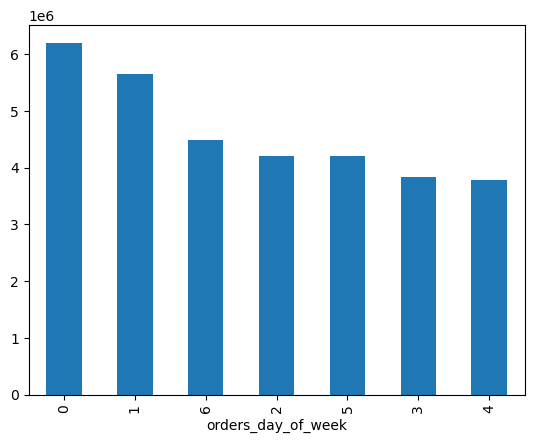

In [17]:
# creat bar chart
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

## Exporting Charts

In [20]:
# print out frequency of order_day_of_week
df_ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6203329
1    5659298
6    4495887
2    4213105
5    4205076
3    3839865
4    3783172
Name: count, dtype: int64

In [22]:
# both prints out frequency but orders them by day of the week
df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6203329
1    5659298
2    4213105
3    3839865
4    3783172
5    4205076
6    4495887
Name: count, dtype: int64

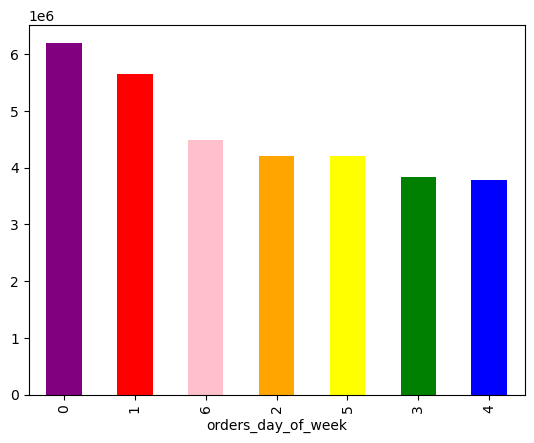

In [24]:
# assigned multiple colors to bar chart
bar_color = df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [26]:
# exporting the bar chart into project folder
bar_color.figure.savefig(os.path.join(path, '04_Analysis','04.03_Visualizations', '04.09_bar_orders_dow.png'))

## Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

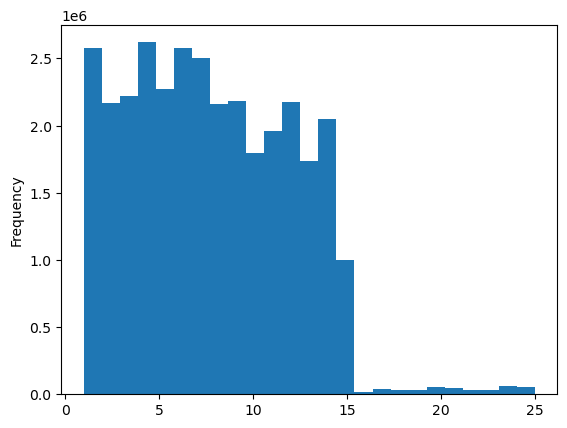

In [29]:
# creating histogram of "prices" column
df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [31]:
# Getting information on data
# NOTE: my data doesn't have thee 99,999 like the reading does since I passed my filtered info along
# Hency why the reading is having this in
df_ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [33]:
# Getting mean for same reason as above
df_ords_prods_merge['prices'].mean()

7.7909940921733565

In [43]:
# Getting median for same reason as above
df_ords_prods_merge['prices'].median()

7.4

In [45]:
# Getting max for same reason as above
df_ords_prods_merge['prices'].max()

25.0

<Axes: xlabel='prices', ylabel='prices'>

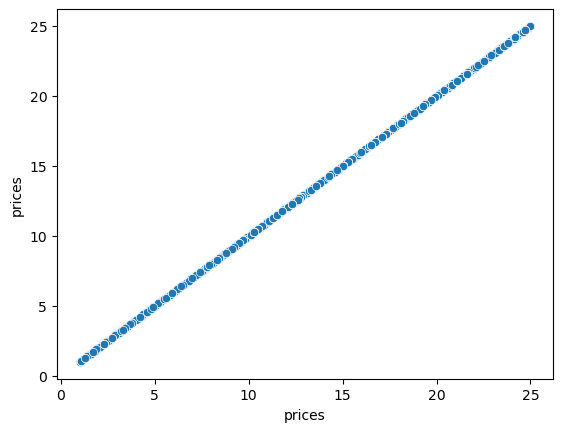

In [47]:
# Creating a scatterplot for "prices"
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [48]:
# check for items above $100
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,match,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag


In [51]:
# turning outliers into NaNs
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [53]:
# checking max value of price
df_ords_prods_merge['prices'].max()

25.0

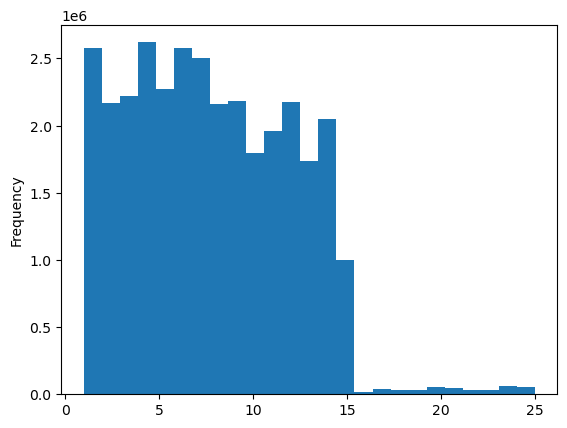

In [55]:
# creating new histagram and assigning to new variable hist
hist = df_ords_prods_merge['prices'].plot.hist(bins = 25)

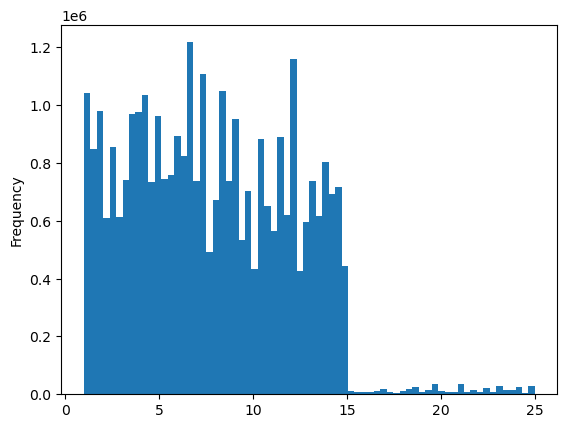

In [57]:
# creating new histagram with bins = to 70 and assigning it to hist_2
hist_2 = df_ords_prods_merge['prices'].plot.hist(bins = 70)

## Creating Line Charts

In [60]:
# creates subset
df_ords_prods_merge_sub = df_ords_prods_merge[:2000000]

## Sampling Data

In [63]:
# Group by 'loyalty_flag' and calculate the required statistics on the copied DataFrame
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [65]:
# prints an array of randomized true and false values
dev

array([False,  True, False, ..., False,  True,  True])

In [67]:
# 10 randomly selected numbers
np.random.rand(10)

array([0.23055224, 0.64519968, 0.82012101, 0.90021919, 0.2001039 ,
       0.0323489 , 0.7061233 , 0.10883532, 0.00193764, 0.89102284])

In [69]:
# Splitting your dataframe into two samples
big = df_ords_prods_merge[dev]
small = df_ords_prods_merge[~dev]

In [71]:
#Create a list of holding True/False values to the test np.random.rant() <=0.7
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [73]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_merge[dev]

In [75]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_merge[~dev]

In [77]:
# 
len(df_ords_prods_merge)

32399732

In [79]:
# 
len(big) + len(small)

32399732

In [81]:
# 
df_2 = small[['orders_day_of_week','prices']]

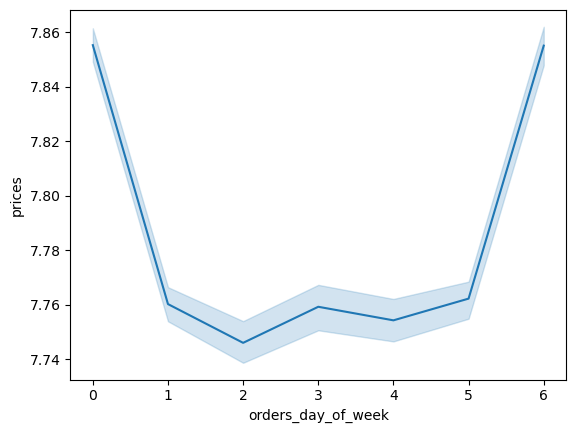

In [85]:
# 
line_price_orders_day_of_week = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [87]:
# Export prices vs orders_day_of_week
line_price_orders_day_of_week.figure.savefig(os.path.join(path, '04_Analysis','04.03_Visualizations', '4.9_line_price_orders_day_of_week.png'))

In [117]:
# Verify count info for column
df_4 = df_ords_prods_merge[['orders_day_of_week','prices']]

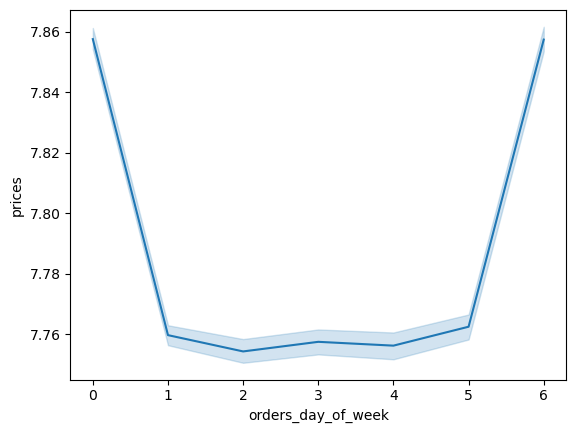

In [120]:
# Verify top 60 rows worth of information
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week',y = 'prices')

## Exporting Data

In [124]:
# Export the updated dataframe as a pickle file
df_ords_prods_merge.to_pickle(os.path.join(path, '02_Data','02.02_Prepared Data', '4.9_orders_products_visualized.pkl'))